Л1.1 Побудуйте гiстограму частот появи лiтер в текстi.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def alphabet():
    ans = {}
    for letter in range(ord('а'), ord('я')+1):
        ans[chr(letter)] = 0
        if chr(letter) == 'и':
            ans['і'] = 0
            ans['ї'] = 0
        if chr(letter) == 'г':
            ans['ґ'] = 0
        if chr(letter) == 'е':
            ans['є'] = 0
    ans.pop('э')
    ans.pop('ъ')
    ans.pop('ы')
    return ans, 33

In [3]:
#alphabet()

In [4]:
def frequency(text):
    freq,n = alphabet()
    for el in text:
        if el.isalpha():
            try:
                freq[el.lower()] += 1
            except:
                pass
    return freq,n

In [5]:
def plot_text(filename = "text.txt"):
    f = open(filename, 'r', encoding = 'utf-8')
    text = f.read()
    #print(len(text))
    freq,n = frequency(text)
    names = freq.keys()
    values = freq.values()
    plt.bar(names, values)
    plt.xlabel('Letters')
    plt.ylabel('Frequency')
    return freq

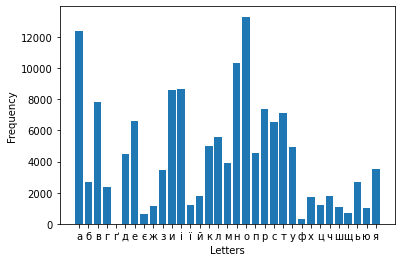

In [6]:
freq = plot_text()

In [7]:
freq

{'а': 12374,
 'б': 2665,
 'в': 7800,
 'г': 2396,
 'ґ': 10,
 'д': 4490,
 'е': 6637,
 'є': 631,
 'ж': 1150,
 'з': 3463,
 'и': 8619,
 'і': 8672,
 'ї': 1181,
 'й': 1801,
 'к': 5020,
 'л': 5571,
 'м': 3933,
 'н': 10313,
 'о': 13315,
 'п': 4521,
 'р': 7373,
 'с': 6523,
 'т': 7131,
 'у': 4931,
 'ф': 339,
 'х': 1755,
 'ц': 1206,
 'ч': 1816,
 'ш': 1109,
 'щ': 672,
 'ь': 2669,
 'ю': 1043,
 'я': 3528}

Л1.2 Реалiзуйте алгоритм шифрування Вiженера.

In [8]:
def rev_abc():
    abc,n = alphabet()
    letters = abc.keys()
    i = 0
    abc_rev = {}
    for el in letters:
        abc_rev[i] = el
        abc[el] = i
        i += 1
    #print('abc',abc,'\nabc_rev',abc_rev)
    return abc,abc_rev,n

In [9]:
def add(first, second):
    '''first, second are letters'''
    abc, abc_rev,n = rev_abc()
    num1 = abc[first]
    num2 = abc[second]
    return abc_rev[(num1 + num2)%n]

In [10]:
def clean_text(text):
    abc, n = alphabet()
    #print('ф' in list(abc.keys()))
    cleaned = ''
    for el in text:
        #print(el)
        if el.isalpha() and el.lower() in list(abc.keys()):
            cleaned += el.lower()
    return cleaned

In [11]:
def vigenere(text, key):
    m = len(key)
    text = clean_text(text)
    n = len(text)
    
    cipher = ''
    addent = key * (n//m) + key[:(n%m)]
    #print(len(addent) == n)
    for i in range(n):
        cipher += add(text[i], addent[i])
    return cipher

In [12]:
#cipher

In [13]:
def sub(first, second):
    '''first, second are letters'''
    abc, abc_rev,n = rev_abc()
    num1 = abc[first]
    num2 = abc[second]
    return abc_rev[(num1 - num2 + n)%n]

In [37]:
def decryption(cipher, key):
    m = len(key)
    n = len(cipher)
    text = ''
    subtr = key * (n//m) + key[:(n%m)]
    for i in range(n):
        text += sub(cipher[i], subtr[i])
    return text

In [15]:
#decryption(cipher, key) 

Л1.3 Проведiть криптоаналiз шифру Вiженера i розшифруйте запропонований крипто-
текст, не знаючи секретного ключа.

In [101]:
def index_of_coincidence(freq):
    ic = {}
    n = sum(freq.values())
    #print(freq)
    for letter  in freq.keys():
        try:
            ic[letter] = (freq[letter]*(freq[letter]-1))/(n*(n-1))
        #print(freq[letter])
        except:
            pass
    return ic

144657


<BarContainer object of 33 artists>

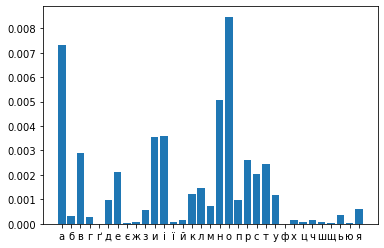

In [93]:
#print(type(freq))
freq1 = index_of_coincidence(freq)
names = freq1.keys()
values = freq1.values()
plt.bar(names, values)


#freq1

In [72]:
def split_text(text,k):
    slices = []
    for i in range(k):
        slices.append(text[i::k])
    return slices

In [81]:
def find_len(text):
    ics = []
    min_len = 5
    max_len = 20
    for i in range(min_len, max_len + 1):
        split__text = split_text(text,i)
        ic_slices = []
        for el in split__text:
            
            ic_slices.append(sum(index_of_coincidence(frequency(el)[0]).values()))
        ics.append(np.mean(ic_slices))  
    lens = []
    for i in range(4):
        lens.append(ics.index(max(ics)) + min_len)
        ics[lens[-1] - min_len] = 0

    return lens

In [82]:

f = open('franko.txt', 'r', encoding = 'utf-8')
text = f.read()
key='життя'
cipher = vigenere(text, key)

In [83]:
find_len(cipher)

[20, 10, 5, 15]

In [84]:
def expected_freq(length):
    f = open('text.txt', 'r', encoding = 'utf-8')
    text = f.read()
    #print(len(text))
    freq,n = frequency(text)
    ans = {}
    for el in freq.keys():
        ans[el] = freq[el]*length / len(text)
    #print("aaaaaaaaaaaa",ans)
    return ans

In [85]:
def chi_stat(text, expectation):
    ans = 0
    f, n = frequency(text)
    for letter in f.keys():
        ans += ((f[letter] - expectation[letter])**2)/expectation[letter]
    return ans

In [86]:
def break_caesar(text):
    expectation = expected_freq(len(text))
    abc, n = alphabet()
    #print(f)
    #print(expectation)
    all_chi = {}
    for letter in abc.keys():
        #print(expectation[letter],f[letter])
        all_chi[letter] = chi_stat(decryption(text, letter), expectation)
    #print("chi", all_chi)
    min_chi = all_chi['а']
    ans = 'а'
    for letter in abc.keys():
        #print(letter)
        if all_chi[letter] < min_chi:
            min_chi = all_chi[letter]
            ans = letter
    #print('chi',all_chi)
    return ans #all_chi

In [87]:
expectation,n = frequency(text)
f = open("franko.txt",encoding = 'utf-8')
textf = f.read()
text1 = clean_text(textf)
abc, n = alphabet()
acuracy = 0
for key in abc.keys():
    text2 = vigenere(text1, key)
    #print(text2)
    if break_caesar(text2) == key:
        acuracy += 1
    else:
        print(key)

In [88]:
acuracy

33

In [89]:
def crack_code(cipher):
    lens = find_len(cipher)
    #print(lens)
    l = min(lens)
    key = ''

    slices = split_text(cipher,l)
    #print(slices[1] == slices[0])
    for el in slices:
        key += break_caesar(el)
        #print()
    return key
    
    
    

In [77]:
fin = open('final.txt',encoding = 'utf-8')
t = fin.read()
cleaned = clean_text(t)
cipherrr = vigenere(cleaned, 'романтика')
#t
crack_code(cipherrr)

'романтика'

In [67]:
#expectation

In [102]:
fin2 = open('apple.txt',encoding = 'utf-8')
t2 = fin2.read()
cleaned2 = clean_text(t2)
cipherrr2 = vigenere(cleaned2, 'яблуня')
#t
crack_code(cipherrr2)

'яблуня'